In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import json

import tensorflow as tf

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools
from analysis import clustering, standard_analysis, variance

In [2]:
model_n = 0
# task_list = ['dmcgo','dmcnogo']
task_list = ['fdgo','fdanti','delaygo','delayanti']
rule = task_list[0]
which_net = 'l2w0001'
fldr = 'all_tasks'
supp = []#'long_train'

if fldr == '4_tasks':
    s = '_'
    rule_trains_str = s.join(task_list)
    file_spec = os.path.join(fldr,which_net+'_'+rule_trains_str)
else:
    file_spec = which_net
    
dir_specific_all = os.path.join('crystals','softplus',file_spec)#,supp)
    
m = os.path.join(p,'data/rnn/multitask/',net,dir_specific_all,str(model_n))

# m = os.path.join(p,'data/rnn/multitask/','robert',str(model_n))

figpath = os.path.join(p,'code','overleaf','multitask-nets','v1_figs','clusters')
if not os.path.exists(figpath):
    os.makedirs(figpath)

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


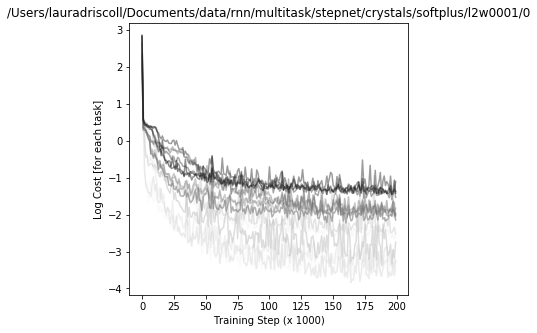

In [3]:
model = Model(m, sigma_rec=0)
with tf.Session() as sess:
    model.restore()
    hp = model.hp

fig = plt.figure(figsize=(5, 5))
cmap=plt.get_cmap('Greys')
fname = os.path.join(m, 'log.json')

with open(fname, 'r') as f:
    log_all = json.load(f)
for r in range(len(hp['rule_trains'])):
    c = cmap((r+1)/(len(hp['rule_trains'])+1))
    ax = fig.add_subplot(1,1,1)
    x = np.log(log_all['cost_'+hp['rule_trains'][r]])
    plt.plot(x,'-',c = c,alpha = .5)
    ax.set_xlabel('Training Step (x 1000)')
    ax.set_ylabel('Log Cost [for each task]')
#     plt.ylim([-6,2])
    
plt.title(m)
plt.show()    

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


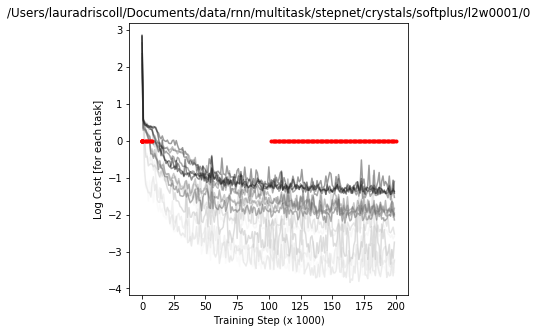

In [135]:
model = Model(m, sigma_rec=0)
with tf.Session() as sess:
    model.restore()
    hp = model.hp

fig = plt.figure(figsize=(5, 5))
cmap=plt.get_cmap('Greys')
fname = os.path.join(m, 'log.json')

from os import listdir
from os.path import isfile, join

mydir = os.path.join(m,'ckpts')
onlyfiles = [int(re.findall(r'\d+',f)[0])/1000 for f in listdir(mydir) if f[-5:]=='.meta']

with open(fname, 'r') as f:
    log_all = json.load(f)
for r in range(len(hp['rule_trains'])):
    c = cmap((r+1)/(len(hp['rule_trains'])+1))
    ax = fig.add_subplot(1,1,1)
    x = np.log(log_all['cost_'+hp['rule_trains'][r]])
    plt.plot(x,'-',c = c,alpha = .5)
    ax.set_xlabel('Training Step (x 1000)')
    ax.set_ylabel('Log Cost [for each task]')

plt.plot(onlyfiles,np.zeros(len(onlyfiles)),'.r')
    
plt.title(m)
plt.show()    

In [7]:
# variance.compute_variance(m)  ##only need to run once for each model

In [9]:
# save_name = '_'+file_spec+'_'+str(model_n)  ##only need to run once for each model

# # # Clustering Analysis------------------------------------------------------
# CA = clustering.Analysis(m, data_type='rule')
# CA.plot_example_unit()
# CA.plot_cluster_score(save_name = save_name)
# CA.plot_variance(save_name = save_name)
# CA.plot_2Dvisualization('PCA')
# CA.plot_2Dvisualization('MDS')
# CA.plot_2Dvisualization('tSNE')
# CA.plot_lesions(save_name = save_name)
# CA.plot_connectivity_byclusters()

Choosing 25 clusters


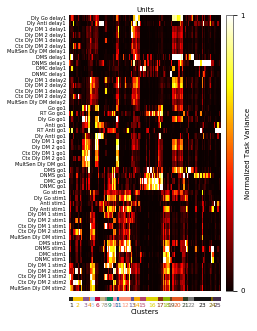

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 125 / 125
[t-SNE] Mean sigma: 0.936486
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.996044
[t-SNE] KL divergence after 800 iterations: 0.237194


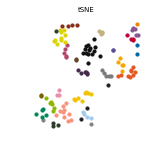

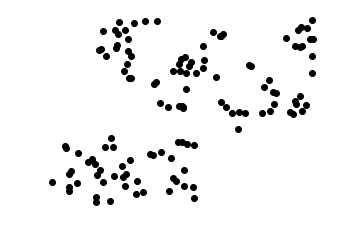

In [14]:
save_name = '_'+file_spec+'_'+str(model_n)

# os.mkdir('figure/')

CA = clustering.Analysis(m, data_type='epoch')
CA.plot_variance(save_name = save_name)
CA.plot_2Dvisualization('tSNE')

In [11]:
# CA.plot_lesions(save_name = save_name)

In [12]:
# perfs_changes, cost_changes = CA.lesions()

In [13]:
# lesion_units_list = [None]
# for il, l in enumerate(CA.unique_labels):
#     ind_l = np.where(CA.labels == l)[0]
#     # In original indices
#     lesion_units_list += [CA.ind_active[ind_l]]

# for i, lesion_units in enumerate(lesion_units_list):
#     print(i)
#     print(lesion_units)

In [14]:
# cluster=2
# tasks_affected = np.where(perfs_changes[cluster,:]<-.5)[0]
# task_list = [hp['rule_trains'][x] for x in tasks_affected]

In [23]:
from tools_lnd import make_h_all

rule = task_list[0]
# epoch = 'delay1'
hparams = model.hp
# trial = generate_trials(rule, hparams, 'test', noise_on=False)
h_all_byepoch, h_all_byrule = make_h_all(m)

X_rule = h_all_byrule[rule]
X_use = np.reshape(X_rule[:],(-1,hparams['n_rnn']))
for rule in task_list:
    X_rule = h_all_byrule[rule]
    X_use = np.concatenate((X_use,np.reshape(X_rule[:],(-1,hparams['n_rnn']))),axis = 0)

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
fp_pca = pca.fit_transform(X_use)
D_use = pca.components_.T
# D_use = D_use[:,[0,2,1]]
axes_label1 = 'pca_1'
axes_label2 = 'pca_2'
axes_label3 = 'pca_3'

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [31]:
cluster=8

react_tasks = [1,4]
delay_tasks = [0,2,3,5,6,7,8,9,10]
anti_tasks = [3,4,5]
mod1_tasks = [6,8]
mod2_tasks = [7,9]

task_list = [hp['rule_trains'][x] for x in mod1_tasks]

In [32]:
print(task_list)

[u'delaydm1', u'contextdelaydm1']


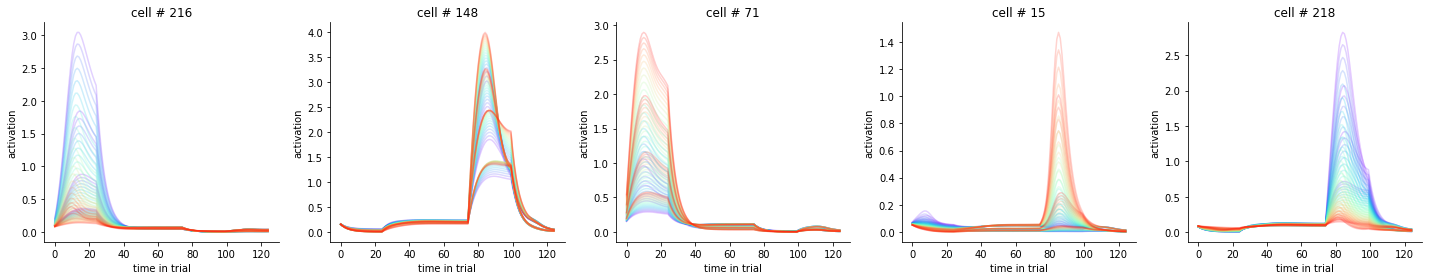

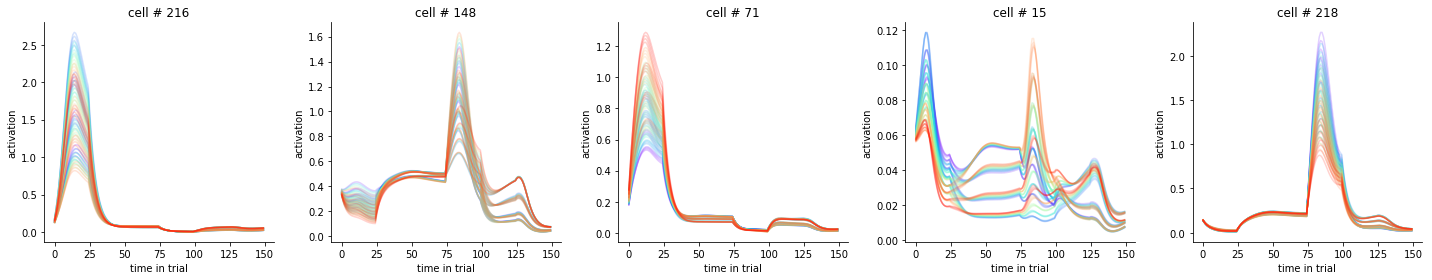

In [33]:
cmap = plt.get_cmap('rainbow')

cel_use = CA.ind_active[CA.labels==cluster]

for rule in task_list:
    fig = plt.figure(figsize=(4*len(cel_use),4),tight_layout=True,facecolor='white')
    X_use = h_all_byrule[rule]
    cel_i = 0
    for unit_i in cel_use:
        cel_i+=1
        ax = plt.subplot(1,len(cel_use),cel_i)
        X_flat = np.reshape(X_use[:],(-1,hp['n_rnn']))
        for n in range(80):
            plt.plot(X_flat[range(n,len(X_flat),np.shape(X_use)[1]),unit_i],'-',c = cmap(n/80),alpha = .2)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.title('cell # '+(str(unit_i)))
        plt.xlabel('time in trial')
        plt.ylabel('activation')

In [22]:
from tools_lnd import get_model_params
w_in, b_in, w_out, b_out = get_model_params(m)
D_use = w_out[:,1:]

axes_label1 = 'W_{out} cos(theta)'
axes_label2 = 'W_{out} sin(theta)'

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [22]:
task_list = ['fdanti',]

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from numpy import linalg as LA
from tools_lnd import make_h_trial_rule, get_T_inds, make_Beta
Beta_qr,Y_labels = make_Beta(m,task_list,'stim1',ind=-1)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [24]:
use_yinds = [2,1,3]
axes_label1 = Y_labels[use_yinds[0]]
axes_label2 = Y_labels[use_yinds[1]]
axes_label3 = Y_labels[use_yinds[2]]
D_use = Beta_qr[:,use_yinds]

In [25]:
D_use[:,1] = w_out[:,1]
axes_label2 = 'W_{out} cos(theta)'

In [26]:
react_tasks = [1,4]
delay_tasks = [0,2,3,5,6,7,8,9,10]
anti_tasks = [3,4,5]

task_list = [hp['rule_trains'][x] for x in anti_tasks]

In [24]:
cluster = 8
ind_l = np.where(CA.labels == cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

In [25]:
model = FixedPoint_Model(CA.model_dir)
hp = model.hp
with tf.Session() as sess:
    model.restore()
    model._sigma=0
    if len(lesion_units_list)>0:
        model.lesion_units(sess, lesion_units_list)

    for rule in task_list:
        trial = generate_trials(rule, hp, 'test', noise_on = 'False')
        feed_dict = tools.gen_feed_dict(model, trial, hp)
        h_tf = sess.run([model.h], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [26]:
def gen_X_from_model_dir(model_dir,trial,d = [],lesion_units_list = []):
    model = Model(model_dir)
    with tf.Session() as sess:

        if len(d)==0:
            model.restore()
        else:
            model.saver.restore(sess,d)

        if len(lesion_units_list)>0:
            model.lesion_units(sess, lesion_units_list)

        # model._sigma=0
        # get all connection weights and biases as tensorflow variables
        var_list = model.var_list
        # evaluate the parameters after training
        hparams = model.hp
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        # run model
        h_tf, y_hat_tf = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)
        x = np.transpose(h_tf,(2,1,0)) # h_tf[:,range(1,n_trials),:],(2,1,0))
        X = np.reshape(x,(x.shape[0],-1))
    return X, x    #return orthogonal complement of hidden unit activity to ouput projection matrix

In [27]:
lesion_units_list

array([216, 148,  71,  15, 218])

In [28]:
from network import get_perf
from task import generate_trials
from tools_lnd import get_T_inds
from numpy import linalg as LA

def get_h_diff(model_dir, task_list, lesion_units_list, d = []):

    model = FixedPoint_Model(model_dir)
    hp = model.hp

    h_diff = {}
    h_diff_norm = {}
    h_error_labels = {}
    h_error = {}

    for ri in range(len(task_list)):
        rule = task_list[ri]

        trial = generate_trials(rule, hp, 'test', noise_on = 'False')

        _,h = gen_X_from_model_dir(model_dir,trial,d = d,lesion_units_list = [])
        _,h_lesion = gen_X_from_model_dir(model_dir,trial,d = d,lesion_units_list = lesion_units_list)

        h_diff[rule] = h - h_lesion
        h_diff_norm[rule] = LA.norm(h_diff[rule],axis = 0)

        h_error_labels[rule] = trial.epochs.keys()
        h_error[rule] = np.empty(len(trial.epochs.keys()))

        for ei in range(len(trial.epochs.keys())):
            epoch = trial.epochs.keys()[ei]
            T_inds = get_T_inds(trial,epoch)
            h_error[rule][ei] = np.mean(h_diff_norm[rule][:,T_inds].flatten())

    return h_diff, h_diff_norm, h_error_labels, h_error

def vis_h_diff(model_dir, task_list, h_diff):
    
    model = FixedPoint_Model(model_dir)
    hp = model.hp
    
    nc = 3
    fig = plt.figure(figsize=(nc*4,len(task_list)),tight_layout=True,facecolor='white')
    for ri in range(len(task_list)):
        rule = task_list[ri]
        trial = generate_trials(rule, hp, 'test', noise_on = 'False')

        ax = plt.subplot(int(np.ceil(len(task_list)/nc)),nc,ri+1)

        subselect_trials = h_diff[rule][:,npr.permutation(h_diff[rule].shape[1])[:80],:]
        plt.plot(LA.norm(subselect_trials,axis = 0).T,c = c,alpha = .1)

        for epoch in trial.epochs.keys():
            T_inds = get_T_inds(trial,epoch) 
            plt.plot([T_inds[-1],T_inds[-1]],[0,5],'dodgerblue',alpha = .5)

        plt.title(rule)
        plt.ylim([0,12])


def vis_h_diff_learning(model_dir, task_list, h_diff, c='k'):
    
    model = FixedPoint_Model(m)
    hp = model.hp

    nc = 3
    fig = plt.figure(figsize=(nc*4,len(task_list)),tight_layout=True,facecolor='white')
    for ri in range(len(task_list)):
        rule = task_list[ri]
        trial = generate_trials(rule, hp, 'test', noise_on = 'False')

        ax = plt.subplot(int(np.ceil(len(task_list)/nc)),nc,ri+1)

    #     subselect_trials = h_diff[rule][:,npr.permutation(h_diff[rule].shape[1])[:80],:]
        mean_trials = np.mean(h_diff[rule],axis = 1)
        plt.plot(LA.norm(mean_trials,axis = 0),c = c,alpha = .8,linewidth = 3)

        for epoch in trial.epochs.keys():
            T_inds = get_T_inds(trial,epoch) 
            plt.plot([T_inds[-1],T_inds[-1]],[0,5],'dodgerblue',alpha = .5)

        plt.title(rule)
        plt.ylim([0,5])

In [1]:
np.max(CA.labels)

NameError: name 'np' is not defined

Overwrite sigma_rec with 0.000
0.0
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/laurad

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

IndexError: too many indices for array

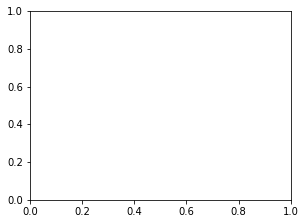

In [29]:
from numpy import linalg as LA
import numpy.random as npr

# lesion cluster
cluster = 8
ind_l = np.where(CA.labels == cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

task_list = np.concatenate((rules_dict['all'][:6],rules_dict['all'][11:]))

h_diff, h_diff_norm, h_error_labels, h_error = get_h_diff(CA.model_dir, task_list, lesion_units_list)
vis_h_diff(CA.model_dir, task_list, h_diff_norm)

Overwrite sigma_rec with 0.000
0.0


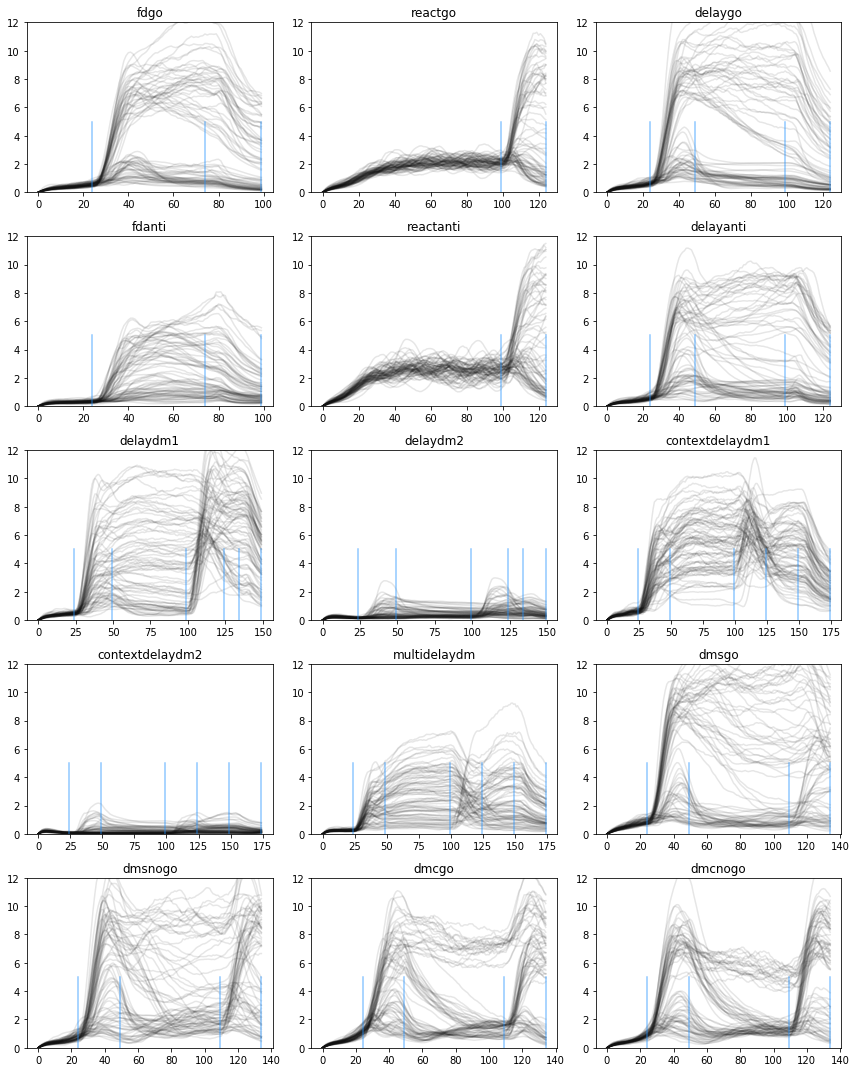

In [30]:
model = FixedPoint_Model(CA.model_dir)
hp = model.hp

nc = 3
fig = plt.figure(figsize=(nc*4,len(task_list)),tight_layout=True,facecolor='white')
for ri in range(len(task_list)):
    rule = task_list[ri]
    trial = generate_trials(rule, hp, 'test', noise_on = 'False')

    ax = plt.subplot(int(np.ceil(len(task_list)/nc)),nc,ri+1)

    subselect_trials = h_diff[rule][:,npr.permutation(h_diff[rule].shape[1])[:80],:]
    plt.plot(LA.norm(subselect_trials,axis = 0).T,c = c,alpha = .1)

    for epoch in trial.epochs.keys():
        T_inds = get_T_inds(trial,epoch) 
        plt.plot([T_inds[-1],T_inds[-1]],[0,5],'dodgerblue',alpha = .5)

    plt.title(rule)
    plt.ylim([0,12])

Overwrite sigma_rec with 0.000
0.0
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/laurad

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

0.0
Overwrite sigma_rec with 0.000
0.0
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/la

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

0.0
Overwrite sigma_rec with 0.000
0.0
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/la

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

0.0
Overwrite sigma_rec with 0.000
0.0
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/la

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

0.0


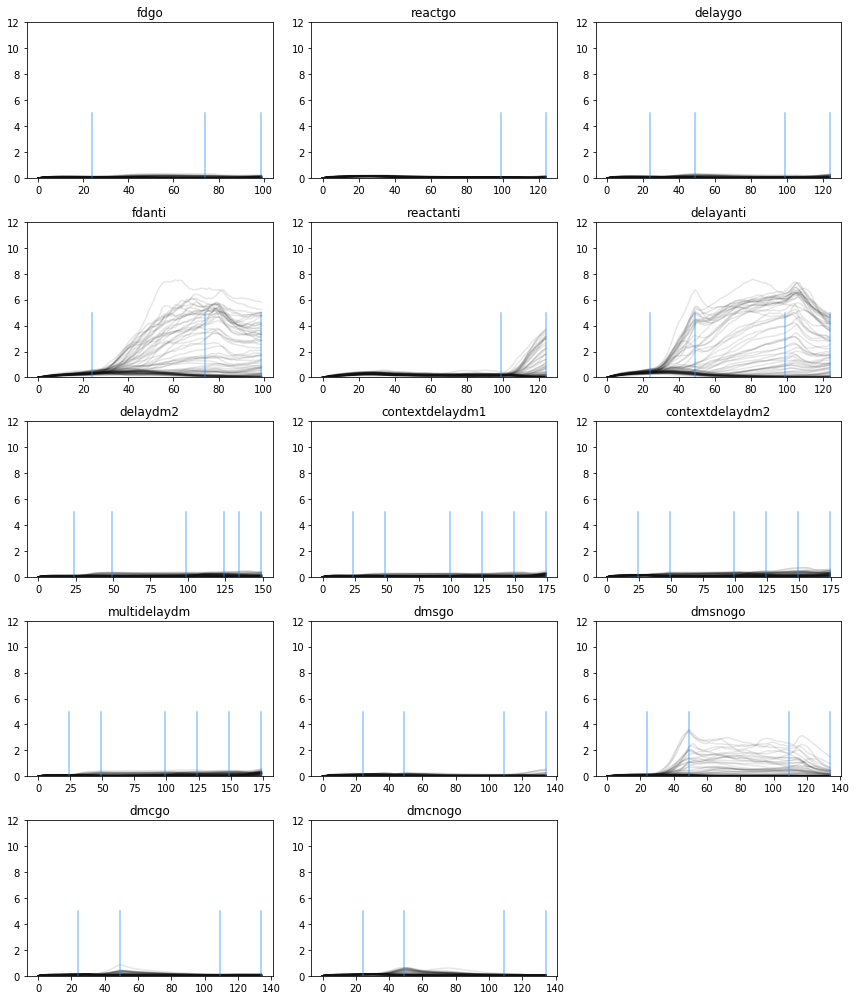

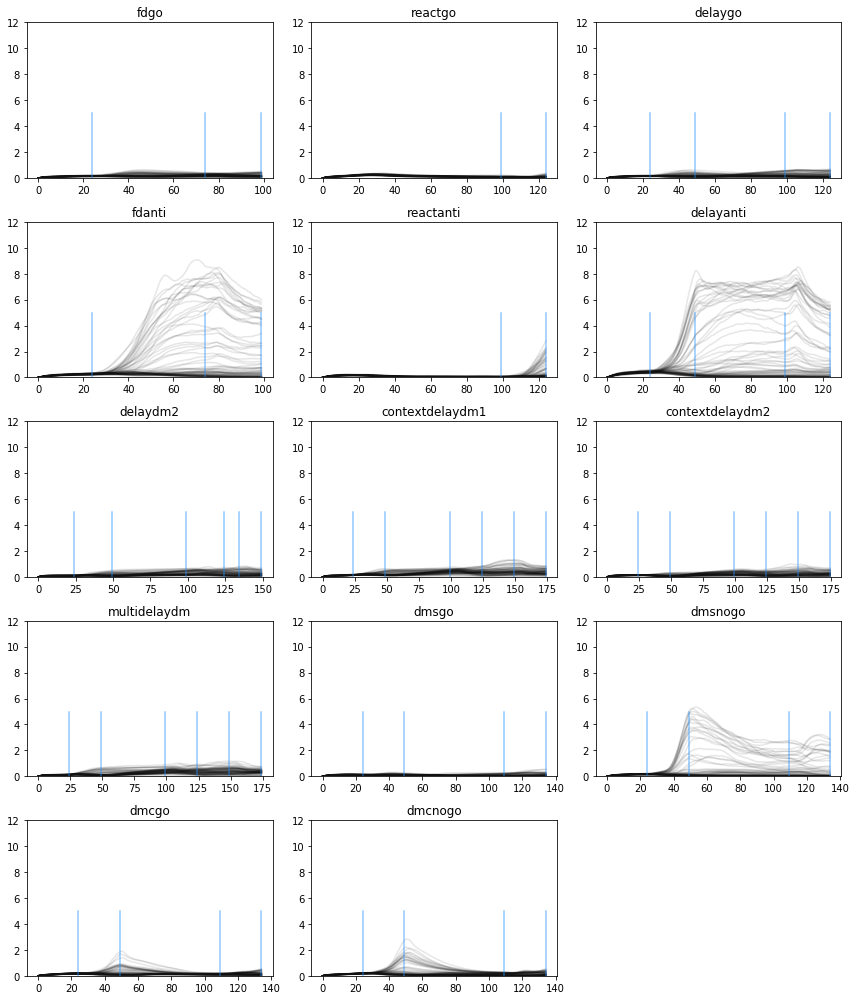

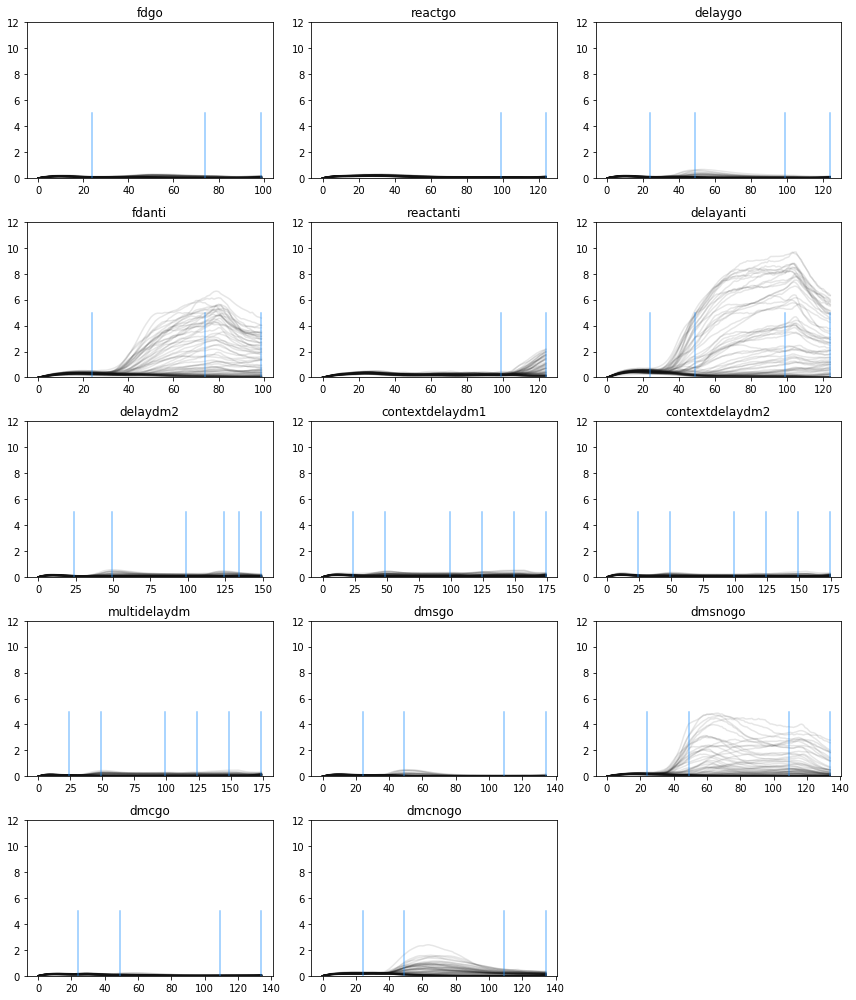

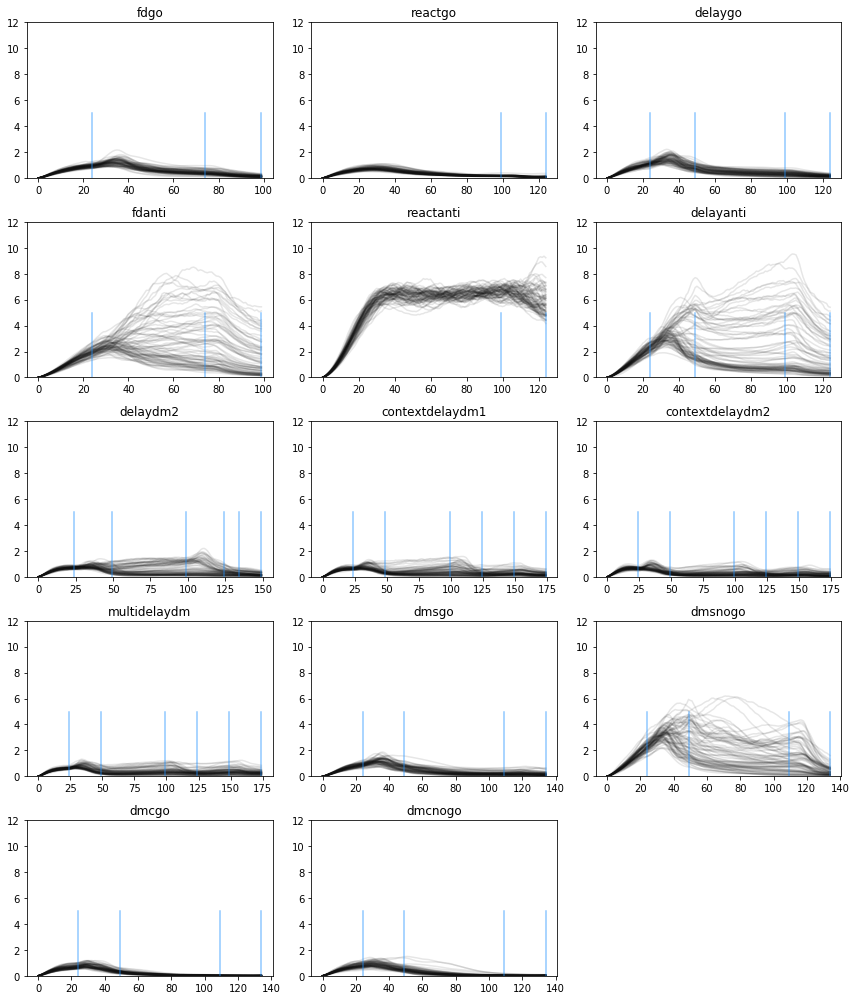

In [162]:
# lesion cluster
cluster = 6
ind_l = np.where(CA.labels == cluster)[0]

task_list = np.concatenate((rules_dict['all'][:6],rules_dict['all'][12:]))

h_diff_single = {}
for lesion_ind in range(len(ind_l)):
    lesion_units_list = [[CA.ind_active[ind_l]][0][lesion_ind],]
    h_diff_single[lesion_ind], h_diff_norm, h_error_labels, h_error = get_h_diff(CA.model_dir, task_list, lesion_units_list)
    vis_h_diff(CA.model_dir, task_list, h_diff_single[lesion_ind])

In [210]:
mydir = os.path.join(m,'ckpts')
f_n = [int(re.findall(r'\d+',f)[0]) for f in listdir(mydir) if f[-5:]=='.meta']
fs = [f for f in listdir(mydir) if f[-5:]=='.meta']
d_list = [fs[int(ii)] for ii in np.argsort(f_n)]

In [211]:
for d in np.sort(f_n):
    ckpt_n = d
    ckpt_n_dir = os.path.join(m,'ckpts/model.ckpt-' + str(int(ckpt_n)) + '.meta')
    print(ckpt_n_dir)

/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-1.meta
/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-2.meta
/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-3.meta
/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-4.meta
/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-5.meta
/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-6.meta
/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-7.meta
/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-8.meta
/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-9.meta
/Users/lau

In [222]:
np.max(f_n)

200000

Overwrite sigma_rec with 0.000
0.0


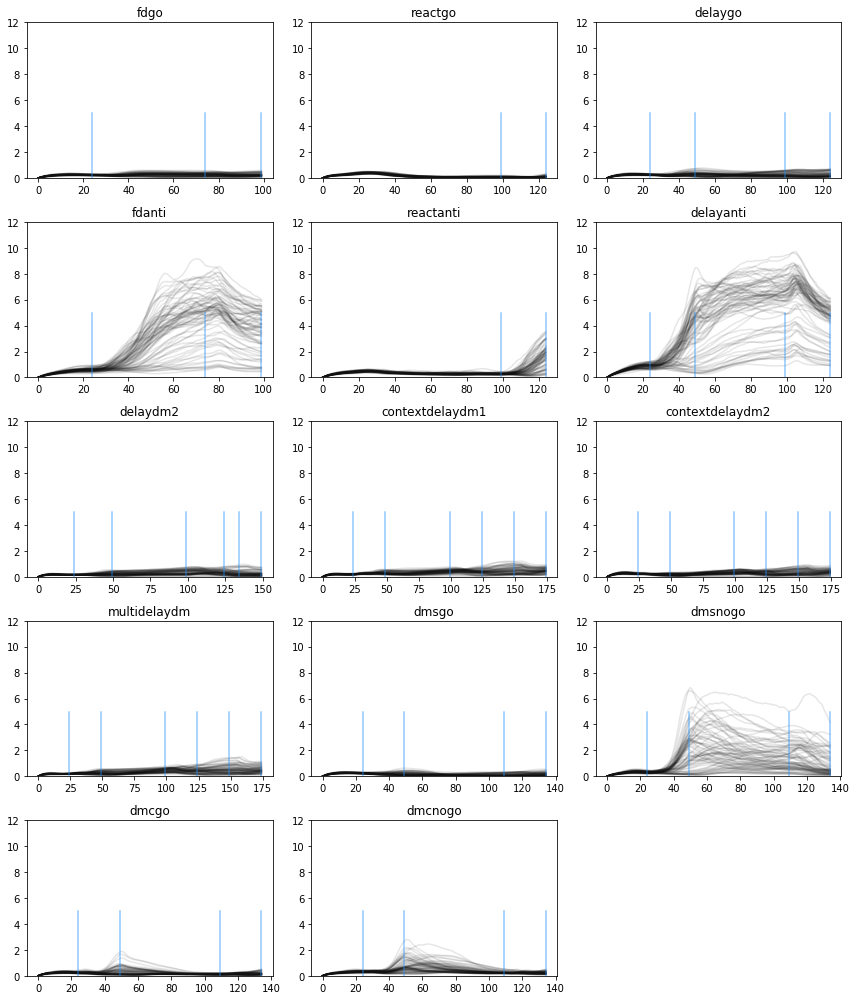

In [236]:
# # lesion cluster
# cmap = plt.get_cmap('plasma')
# cluster = 6
# ind_l = np.where(CA.labels == cluster)[0]

# task_list = np.concatenate((rules_dict['all'][:6],rules_dict['all'][12:]))

# h_diff_single = {}
# lesion_units_list = [CA.ind_active[ind_l]][0][:-1]

# # mydir = os.path.join(m,'ckpts')
# # onlyfiles = [f for f in listdir(mydir) if f[-5:]=='.meta']

# # for f_ni in np.sort(f_n)[:-1]:
# #     ckpt_n = f_ni
# #     ckpt_n_dir = os.path.join(m,'ckpts/model.ckpt-' + str(int(ckpt_n)) + '.meta')

# h_diff_learning, _, _, _ = get_h_diff(CA.model_dir,task_list,lesion_units_list,d=[])
vis_h_diff(CA.model_dir, task_list, h_diff_learning)

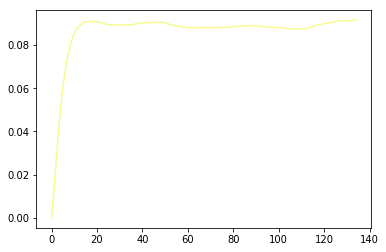

In [247]:
cmap = plt.get_cmap('plasma')


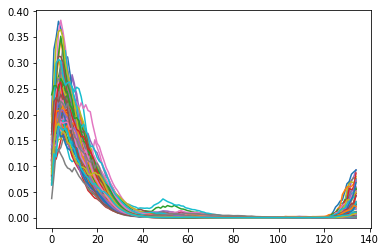

In [259]:
plt.plot(h_lesion[:,:,160])
plt.show()

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-1
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-6
0.158113883008419
Variables being optimized:
<tf.Variable 

INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-170000
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-175000
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users

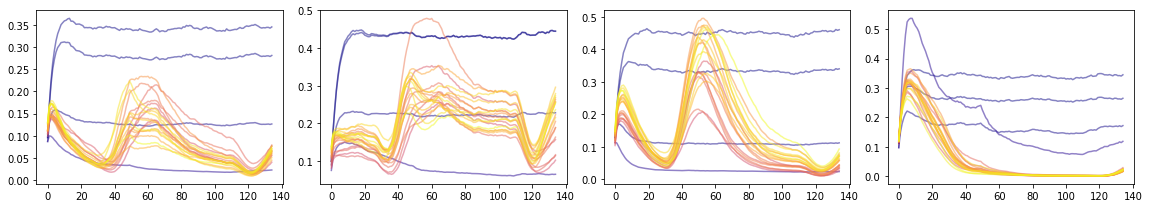

In [264]:
from tools_lnd import find_ckpts

fig = plt.figure(figsize=(4*len(lesion_units_list),3),tight_layout=True,facecolor='white')
model_dir = os.path.join(p,'data/rnn/multitask/stepnet/crystals/softplus/l2w0001',str(model_n))
s_all = find_ckpts(model_dir)
ckpt_list = np.sort(s_all)[0:-1:5]

h_diff = {}

for ckpt_n in ckpt_list: #155):
    ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(ckpt_n)))
    model = Model(model_dir)
    with tf.Session() as sess:
        model.saver.restore(sess,ckpt_n_dir)
        
        # get all connection weights and biases as tensorflow variables
        var_list = model.var_list
        # evaluate the parameters after training
        hparams = model.hp
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        # run model
        h = sess.run(model.h, feed_dict=feed_dict) #(n_time, n_condition, n_neuron)
        
        model.lesion_units(sess, lesion_units_list)
        # get all connection weights and biases as tensorflow variables
        var_list = model.var_list
        # evaluate the parameters after training
        hparams = model.hp
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        # run model
        h_lesion = sess.run(model.h, feed_dict=feed_dict) #(n_time, n_condition, n_neuron)
        
        for axi in range(len(lesion_units_list)):
            plt.subplot(1,len(lesion_units_list),axi+1)
            h_diff = h[:,:,lesion_units_list[axi]]#LA.norm(h - h_lesion,axis = 2)
            plt.plot(np.mean(h_diff,axis= 1),c = cmap(ckpt_n/np.max(ckpt_list)),alpha = .5)
        
plt.show()

In [253]:
[CA.ind_active[ind_l]][0]

array([237,  23,  63, 160])

In [ ]:
# lesion cluster
cluster = 6
ind_l = np.where(CA.labels == cluster)[0]

task_list = ['reactanti',]

h_diff_single = {}
lesion_units_list = [CA.ind_active[ind_l]][0][:-1]

h_diff_single[lesion_ind], h_diff_norm, h_error_labels, h_error = get_h_diff(CA.model_dir, task_list, lesion_units_list)
vis_h_diff(CA.model_dir, task_list, h_diff_single[lesion_ind])

In [228]:
from tools_lnd import restore_ckpt

model = restore_ckpt(m, 1)

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-1.meta


DataLossError: Unable to open table file /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-1.meta: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op u'save/RestoreV2', defined at:
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tornado/ioloop.py", line 1073, in start
    handler_func(fd_obj, events)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 456, in _handle_events
    self._handle_recv()
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 486, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 438, in _run_callback
    callback(*args, **kwargs)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-228-ca4ca05533b6>", line 3, in <module>
    model = restore_ckpt(m, 1)
  File "/Users/lauradriscoll/Documents/code/multitask-nets/stepnet/tools_lnd.py", line 108, in restore_ckpt
  File "/Users/lauradriscoll/Documents/code/multitask-nets/stepnet/network.py", line 490, in __init__
    self._build(hp)
  File "/Users/lauradriscoll/Documents/code/multitask-nets/stepnet/network.py", line 535, in _build
    self.saver = tf.train.Saver(max_to_keep=None)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1281, in __init__
    self.build()
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1293, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1330, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 778, in _build_internal
    restore_sequentially, reshape)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 397, in _AddRestoreOps
    restore_sequentially)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 829, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1463, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

DataLossError (see above for traceback): Unable to open table file /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-1.meta: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]


In [57]:
n_bins = 16
n_rep = 16
batch_size_test = 256*16
batch_size_test_rep = int(batch_size_test / n_rep)
clsq_tmp = list()
perf_tmp = np.empty((len(task_list),n_rep,n_bins-1))
        
model = Model(CA.model_dir)
hp = model.hp
with tf.Session() as sess:
    model.restore()
    model.lesion_units(sess, lesion_units_list)

    perfs_store = list()
    cost_store = list()
    for rule_i in range(len(task_list)):
        rule = task_list[rule_i]
        for i_rep in range(n_rep):
            trial = generate_trials(rule, hp, 'random',batch_size=batch_size_test_rep)
            feed_dict = tools.gen_feed_dict(model, trial, hp)
            y_hat_test, c_lsq = sess.run([model.y_hat, model.cost_lsq], feed_dict=feed_dict)

            # Cost is first summed over time, and averaged across batch and units
            # We did the averaging over time through c_mask

            # IMPORTANT CHANGES: take overall mean
            bins = np.linspace(0,2*np.pi,n_bins)
            perf_test = np.ones((n_bins-1))
            for theta_i in range(len(bins)-1):
                inds = [all([x>bins[theta_i],x<bins[theta_i+1]]) for x in trial.y_loc[-1,:]]
                perf_test[theta_i] = np.mean(get_perf(y_hat_test[:,inds,:], trial.y_loc[:,inds]))
                
            perf_tmp[rule_i,i_rep,:] = perf_test
#                 clsq_tmp.append(c_lsq)
                

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [58]:
task_list

[u'fdanti', u'reactanti', u'delayanti']

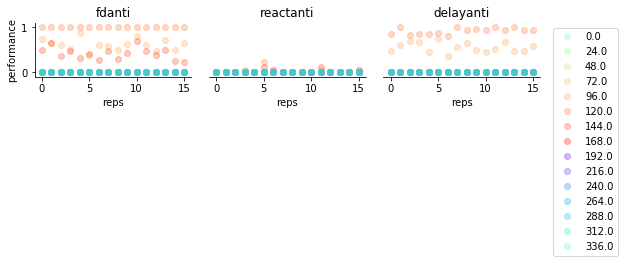

In [59]:
fig = plt.figure(figsize=(3*len(task_list),3),tight_layout=True,facecolor='white')
for rule_i in range(len(task_list)):
    ax = plt.subplot(1,len(task_list),rule_i+1)
    for theta_i in range(len(bins)-1):
        c = (180*(np.pi + bins[theta_i])/np.pi)%360
        plt.plot(perf_tmp[rule_i,:,theta_i],'o',c = cmap(c/360),alpha = .3,label = str(round(180*bins[theta_i]/np.pi,0)))
    plt.ylim([-.1,1.1])
    plt.title(task_list[rule_i])
    plt.xlabel('reps')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if rule_i==0:
        plt.ylabel('performance')
    else:
        ax.spines['left'].set_visible(False)
        plt.yticks([])
            
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [170]:
vmins = [-0.5, -0.5]
vmaxs = [+0.5, +0.5]
ticks = [[-0.5,0.5], [-0.5, 0.5]]

In [ ]:
plt.imshow(perfs_changes.T, cmap='coolwarm', aspect='auto',
                           interpolation='nearest', vmin=vmins[i], vmax=vmaxs[i])

In [29]:
def plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,t_num,fp_epoch,sorted_fps,fp_inds,eig_decomps,
                   xlabel = 'FP set PC1',ylabel = 'FP set PC2',rand_step_coef = 0.1,n_steps = 100,
                   lw = 3,al = .6,linestyle = '-',n_jit = 0,c = 'k'):

    cmap=plt.get_cmap('rainbow')
        
    model = Model(m)
    with tf.Session() as sess:
        model.restore()
        model._sigma=0
        if len(lesion_units_list)>0:
            model.lesion_units(sess, lesion_units_list)
        hparams = model.hp
        alpha = hparams['dt']/hparams['tau']
        var_list = model.var_list
        params = [sess.run(var) for var in var_list]

        trial = generate_trials(rule, hparams, mode='test',noise_on=False)
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        h_tf, _ = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)
        T,S,N = np.shape(h_tf)
        T_inds = get_T_inds(trial,fp_epoch) # grab epoch time indexing
        x_t = np.matlib.repmat(trial.x[T_inds[1],t_num,:],n_steps,1)
        
        fp_project = np.dot(sorted_fps,D_use)

        # runs jitters around fps
        stable = np.empty(len(fp_inds))
        for fp_ind in fp_inds:

            for jit in range(n_jit):
                h0 = sorted_fps[fp_ind,:] + rand_step_coef*npr.randn(N)
                h_t = vanilla_run_with_h0(params, x_t, h0, hparams)
                jitter = np.dot(h_t,D_use)
                ax.plot3D(jitter[:,0],jitter[:,1],jitter[:,2],'-',c = 'k',linewidth = .1)
                
            stable[fp_ind] = np.max(eig_decomps[fp_ind]['evals'].real**2+eig_decomps[fp_ind]['evals'].imag**2)

        stable_inds = np.where(stable<1)[0]
        ax.plot3D(fp_project[stable_inds,0],fp_project[stable_inds,1],fp_project[stable_inds,2],'o',
        c = c,markersize = 10, markerfacecolor = c,alpha = 1,linewidth = 5)

        unstable_inds = np.where(stable>1)[0]
        ax.plot3D(fp_project[unstable_inds,0],fp_project[unstable_inds,1],fp_project[unstable_inds,2],'o',
        c = c,markersize = 10, markerfacecolor = 'None',alpha = 1,linewidth = 5)
                
        #runs one state for n_steps starting from initial conditions
        for jit in range(1):
            h0 = h_tf[T_inds[0],t_num,:]
            h_t = vanilla_run_with_h0(params, x_t, h0, hparams)
            jitter = np.dot(h_t,D_use)
            ax.plot3D(jitter[:,0],jitter[:,1],jitter[:,2],'-',c = c,linewidth = 3)

In [30]:
def plot_N3D(ax,X, D, clist, linewidth = 1, alpha = .5, linestyle = '-'):
    """Plot activity is some 2D space.

        Args:
            X: neural activity in Trials x Time x Neurons
            D: Neurons x 2 plotting dims
        """

    cmap=plt.get_cmap('rainbow')
    S = np.shape(X)[0]
    
    for s in range(S):

        if isinstance(c_list, str) :
            c = clist
        else:
            c = cmap(clist[s]/max(clist))

        X_trial = np.dot(X[s,:,:],D.T)
#         ax.scatter3D(X_trial[-1,0],X_trial[-1,1],X_trial[-1,2],'^',c = c, linewidth = linewidth, alpha = alpha)
        ax.plot3D(X_trial[:,0],X_trial[:,1],X_trial[:,2],linestyle,c = c, linewidth = linewidth, alpha = alpha)
#         ax.scatter3D(X_trial[0,0],X_trial[0,1],X_trial[0,2],'.',c = c, linewidth = linewidth, alpha = alpha)

In [31]:
lesion_cluster = 6
ind_l = np.where(CA.labels == lesion_cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

In [35]:
lesion_units_list

[]

In [38]:
%matplotlib

Using matplotlib backend: MacOSX


In [72]:
lesion_cluster

6

In [103]:
lesion_units_list

[]

In [95]:
lesion_cluster = 6
ind_l = np.where(CA.labels == lesion_cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

In [32]:
lesion_units_list = []

In [64]:
np.shape(D_use)

(256, 3)

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

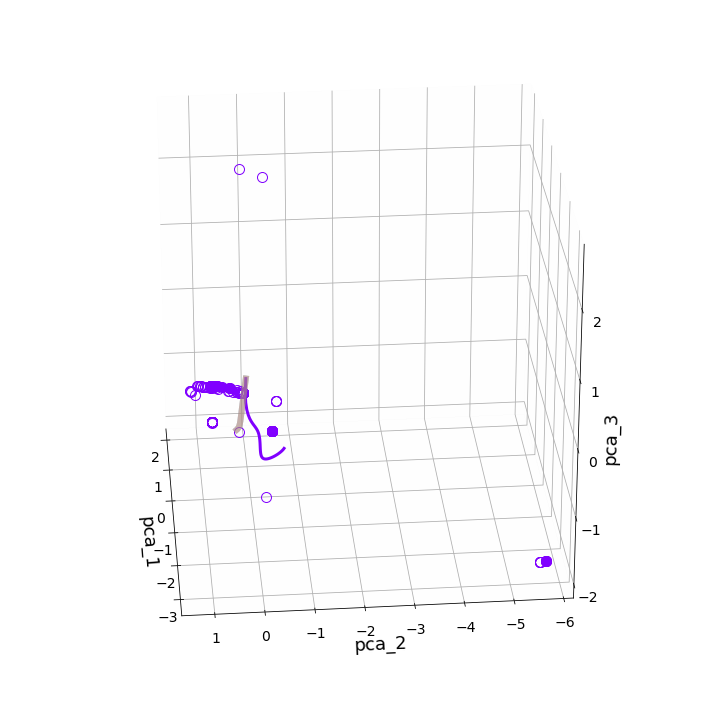

In [117]:
########## TASK DYNAMICS ###########
# from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 14})
from mpl_toolkits import mplot3d
from itertools import compress 
from tools_lnd import gen_X_from_model_dir, gen_trials_from_model_dir, get_T_inds, vanilla_run_with_h0,comp_eig_decomp
import numpy.random as npr


for offset in [0,]:#[0,]:#range(0,360,72):# 144 [180+3*36,]:#
    fig = plt.figure(figsize=(10,10),tight_layout=True,facecolor='white')
    t_set = [(offset+180)%360, (180+offset)%360]
    trial_num = [int((offset)/4.5),int(offset/4.5)]
    trial_set = range(0,80,8)

    rule_set = ['fdanti',]
    epoch_set = ['fix1',]
    step_file = 'task_dynamics'
    linestyle = ['-','--']
    n_interp = 20

    trial_str = '_'.join(str(round(t,2)) for t in t_set[:len(rule_set)])
    rule_str = '_'.join(str(r) for r in rule_set)
    epoch_str = '_'.join(str(r) for r in epoch_set[:len(rule_set)])

    cmap_grad = plt.get_cmap('plasma')
    cmap_rainbow = plt.get_cmap('rainbow')
    cmap_discrete = ['darkorchid','orange']
    ax = fig.add_subplot(111, projection='3d')
    w_color = .005
    ax.w_xaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_yaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_zaxis.set_pane_color ((w_color, w_color, w_color, w_color))

    for ri in range(len(rule_set)):
        rule = rule_set[ri]
        trial = gen_trials_from_model_dir(m,rule,noise_on = False)
        epoch = epoch_set[ri]

#         f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        if len(lesion_units_list)>0:
            f = os.path.join(m,'lesion_fps','tf_fixed_pts_lesion'+str(lesion_cluster+1),rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        else:
            f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        
        fp_struct = np.load(f)
        sorted_fps = fp_struct['xstar']
        fp_inds = range(len(sorted_fps))
        eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])
        
        
        _,x = gen_X_from_model_dir(m,trial)
        T_inds = get_T_inds(trial,epoch)
        x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))

        #color by stim
        c_list = np.min(trial.stim_locs,axis=1)

        #color by target
    #     c_list = trial.y_loc[-1,:]

    
        plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,trial_num[ri],epoch,sorted_fps,fp_inds,eig_decomps,
               rand_step_coef = 0.1, al = 1, linestyle = linestyle, n_steps = 60, 
                   n_jit = 0,c = cmap_rainbow(c_list[trial_num[ri]]/(2*np.pi)))


        plot_N3D(ax,x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ri],alpha = .1)
    
    if len(lesion_units_list)>0:
        save_dir = os.path.join(figpath,step_file,'lesion_fps'+str(lesion_cluster),axes_label1)
        tit = 'lesion_fps'+str(lesion_cluster)+rule_str+'_'+epoch_str+'_'+trial_str
    else:
        save_dir = os.path.join(figpath,step_file,axes_label1)
        tit = 'no lesion '+rule_str+'_'+epoch_str+'_'+trial_str
        
        
    
#     ax.text2D(0.05, 0.95, tit, transform=ax.transAxes)
    ax.set_xlabel(axes_label1,fontsize = 18)
    ax.set_ylabel(axes_label2,fontsize = 18)
    ax.set_zlabel(axes_label3,fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.view_init(27, 175)

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
#     figname = tit+'_'+step_file+'_'+str(t_set[0])
    figname = tit+'_'+step_file+'_'+str(trial_num[0])
#     figname = 'no_trials'
    plt.savefig(os.path.join(save_dir,figname+'.pdf'))
    plt.savefig(os.path.join(save_dir,figname+'.png'))
    plt.show()
#     pdb.set_trace()

In [68]:
tit

'lesion_fps6reactgo_go1_288.0'

In [102]:
save_dir

'/Users/lauradriscoll/Documents/code/overleaf/multitask-nets/v1_figs/clusters/task_dynamics/STIM1  $\\cos{\\theta}$'

In [36]:
from tools_lnd import make_h_all

rule = 'fdanti'
# epoch = 'delay1'
hparams = model.hp
# trial = generate_trials(rule, hparams, 'test', noise_on=False)
h_all_byepoch, h_all_byrule = make_h_all(m)

X_rule = h_all_byrule[task_list[0]]
X_use = np.reshape(X_rule[:],(-1,hparams['n_rnn']))
for rule in task_list:
    X_rule = h_all_byrule[rule]
    X_use = np.concatenate((X_use,np.reshape(X_rule[:],(-1,hparams['n_rnn']))),axis = 0)

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
fp_pca = pca.fit_transform(X_use)
D_use = pca.components_.T
# D_use = D_use[:,[0,2,1]]
axes_label1 = 'pca_1'
axes_label2 = 'pca_2'
axes_label3 = 'pca_3'

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [44]:
########## X STIM ###########
# from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 14})
from mpl_toolkits import mplot3d
from itertools import compress 
from tools_lnd import gen_X_from_model_dir, gen_trials_from_model_dir, get_T_inds, vanilla_run_with_h0, comp_eig_decomp
import numpy.random as npr


for offset in [360-108,]:#range(36,359,36):# 144
    fig = plt.figure(figsize=(6,6),tight_layout=True,facecolor='white')
    t_set = [(180+offset)%360, (180+offset+36)%360]
    trial_num = [int(offset/4.5),int((8+offset/4.5)%80)]
    trial_set = range(0,80,8)

    rule_set = ['fdanti',]
    epoch_set = ['stim1','stim1']
    step_file = 'interp_stim'
    linestyle = ['-','-']
    n_interp = 20

    trial_str = '_'.join(str(round(t,2)) for t in t_set[:len(epoch_set)])
    rule_str = '_'.join(str(r) for r in rule_set)
    epoch_str = '_'.join(str(r) for r in epoch_set)

    cmap_grad = plt.get_cmap('plasma')
    cmap_rainbow = plt.get_cmap('rainbow')
    cmap_discrete = ['navy','gold']
    ax = fig.add_subplot(111, projection='3d')
    w_color = .005
    ax.w_xaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_yaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_zaxis.set_pane_color ((w_color, w_color, w_color, w_color))

    for ri in range(len(rule_set)):
        rule = rule_set[ri]
        trial = gen_trials_from_model_dir(m,rule,noise_on = False)
        epoch = epoch_set[ri]

#         f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        for ti in range(len(t_set)):
            if len(lesion_units_list)>0:
                f = os.path.join(m,'lesion_fps','tf_fixed_pts_lesion'+str(lesion_cluster+1),rule,epoch+'_'+str(t_set[ti])+'.0.npz')
            else:
                f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ti])+'.0.npz')


            fp_struct = np.load(f)
            sorted_fps = fp_struct['xstar']
            fp_inds = range(len(sorted_fps))
            eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])


            _,x = gen_X_from_model_dir(m,trial)
            T_inds = get_T_inds(trial,epoch)
            x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))

            #color by stim
            c_list = np.min(trial.stim_locs,axis=1)

            #color by target
        #     c_list = trial.y_loc[-1,:]


            plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,trial_num[ti],epoch,sorted_fps,fp_inds,eig_decomps,
                   rand_step_coef = 0.1, al = 1, linestyle = linestyle[ri], n_steps = 300, 
                       n_jit = 0,c = cmap_discrete[ti])#cmap_rainbow(c_list[trial_num[ti]]/(2*np.pi)))


        plot_N3D(ax,x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ti],alpha = .3)
    #     c_list = cmap_discrete[ri]
    #     highlight_trial = [trial_num[0],]
    #     plot_N3D(x_epoch[highlight_trial,:,:],D_use.T,c_list,linewidth = 3, linestyle = '-',alpha = 1)

        for step_i in range(n_interp):

            #a couple diff versions on filenames atm
    #         f = rule_set[0]+'_'+rule_set[1]+'_'+epoch_set[0]+'_'+str(t_set[0])+'_step_'+str(step_i)#'_'+str(t_set[1])

#             f = rule_str+'_'+epoch_str+'_'+trial_str+'_step_'+str(step_i)
#             f = rule_str+'_'+'go1'+'_'+trial_str+'_step_'+str(step_i)
            f = rule_str+'_'+'stim1'+'_'+trial_str+'_step_'+str(step_i)

            filename = os.path.join(m,step_file,rule_str,f+'.npz')
            fp_struct = np.load(filename)
            step_fps = fp_struct['xstar']

            fp_project = np.dot(step_fps,D_use)
            ax.plot3D(fp_project[:,0],fp_project[:,1],fp_project[:,2],'.',markersize = 3,c = cmap_grad(step_i/n_interp))

    tit = 'X STIM '+rule_str+'_'+epoch_str+'_'+trial_str
    ax.text2D(0.05, 0.95, tit, transform=ax.transAxes)
    ax.set_xlabel(axes_label1,fontsize = 18)
    ax.set_ylabel(axes_label2,fontsize = 18)
    ax.set_zlabel(axes_label3,fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.view_init(27, 175)

    if len(lesion_units_list)>0:
        save_dir = os.path.join(figpath,step_file,'lesion_fps'+str(lesion_cluster),axes_label1)
    else:
        save_dir = os.path.join(figpath,step_file,axes_label1)
        
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    figname = tit+'_'+step_file+'_'+str(t_set[0])
    plt.savefig(os.path.join(save_dir,figname+'.pdf'))
    plt.savefig(os.path.join(save_dir,figname+'.png'))
    print(os.path.join(save_dir,figname+'.png'))
    plt.show()
#     pdb.set_trace()

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

In [45]:
from tools_lnd import make_FP_axs,take_names
axs ='pca'
ri = 0
rule = rule_set[ri]
epoch_axs = 1
f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch_set[epoch_axs]+'_'+str(t_set[epoch_axs])+'.0.npz')
D_use,_,_ = make_FP_axs(f,m,rule,epoch_set[epoch_axs],axs =axs, clust = 'False')
epoch_name1, rule_name1, _, _ = take_names(epoch_set[0],rule_set[0])
epoch_name2, rule_name2, _, _ = take_names(epoch_set[1],rule_set[0])
axes_label1 = axs + ' 1'
axes_label2 = axs + ' 2'
axes_label3 = axs + ' 3'

stim1
go1


In [45]:
from scipy.spatial import distance
from numpy import linalg as LA
from tools_lnd import eigenspectrum_axes
def dst_to_h(h,sorted_fps):
    X = np.squeeze(sorted_fps).astype(np.float64)
    dst = np.zeros((np.shape(X)[0]))
    for xi in range(np.shape(X)[0]):
            dst[xi] = distance.euclidean(h, X[xi,:])
    return dst

In [46]:
def proximate_fp(h,sorted_fps):
    proximate_fps = np.argsort(dst_to_h(h,sorted_fps))
    return proximate_fps

In [62]:
epoch_set = ['stim1','stim1',]
rule_set = ['fdanti','fdanti']
rule = rule_set[0]
trial_num = 0
trial = gen_trials_from_model_dir(m,rule,noise_on = False)
_,x = gen_X_from_model_dir(m,trial)
T_inds = get_T_inds(trial,epoch_set[0])
h = x[:,trial_num,T_inds[1]]

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

In [63]:
fig = plt.figure(figsize=(6,6),tight_layout=True,facecolor='white')
ax1 = fig.add_subplot(111)

xs = np.linspace(-1, 1, 1000)
ys = np.sqrt(1 - xs**2)

t_set = [0,36]
trial_str = '_'.join(str(round(t,2)) for t in t_set)


for ti in range(len(t_set)):#n_interp
    c = cmap_grad(ti/len(t_set))
    
    if len(lesion_units_list)>0:
        f = os.path.join(m,'lesion_fps','tf_fixed_pts_lesion'+str(lesion_cluster+1),rule,epoch+'_'+str(t_set[ti])+'.0.npz')
    else:
        f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ti])+'.0.npz')

    print(f)
    filename = os.path.join(m,step_file,rule_str,f)
    fp_struct = np.load(filename)
    step_fps = fp_struct['xstar']
        
    proximate_fps = proximate_fp(h,step_fps)
    fp_num = proximate_fps[0]
    evals, _ = LA.eig(fp_struct['J_xstar'][fp_num,:,:]) 
    ax1.plot(evals.real,evals.imag,'.',c=c,alpha = .3,markerfacecolor = c)
    
ax1.plot(xs, ys,':k',linewidth = 1)
ax1.plot(xs, -ys,':k',linewidth = 1)
plt.xlim((.5,1.1))
plt.ylim((-.25,.25))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
eigenspectrum_axes(epoch,ax1)
ax1.set_aspect('equal')   
plt.show()

/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/tf_fixed_pts_all_init/fdanti/stim1_0.0.npz
/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/tf_fixed_pts_all_init/fdanti/stim1_36.0.npz


In [55]:
plt.xlim((.5,1.1))
plt.ylim((-.25,.25))

(-0.25, 0.25)

In [70]:


xs = np.linspace(-1, 1, 1000)
ys = np.sqrt(1 - xs**2)

for offset in range(0,360,36):
    
    t_set = [offset,offset+36]
    trial_str = '_'.join(str(round(t,2)) for t in t_set)
    
    fig = plt.figure(figsize=(6,6),tight_layout=True,facecolor='white')
    ax1 = fig.add_subplot(111)

    for step_i in range(n_interp):#n_interp
        c = cmap_grad(step_i/n_interp)

        f = rule_set[0]+'_'+epoch_set[0]+'_'+epoch_set[1]+'_'+str(t_set[0])+'_step_'+str(step_i)
    #     f = rule_str+'_'+'go1'+'_'+trial_str+'_step_'+str(step_i)
        f = rule_str+'_'+'stim1'+'_'+trial_str+'_step_'+str(step_i)

        print(f)
        filename = os.path.join(m,step_file,rule_str,f+'.npz')
        fp_struct = np.load(filename)
        step_fps = fp_struct['xstar']

        proximate_fps = proximate_fp(h,step_fps)
        fp_num = proximate_fps[0]
        evals, _ = LA.eig(fp_struct['J_xstar'][fp_num,:,:]) 
        ax1.plot(evals.real,evals.imag,'.',c=c,alpha = .3,markerfacecolor = c)

    ax1.plot(xs, ys,':k',linewidth = 1)
    ax1.plot(xs, -ys,':k',linewidth = 1)
    plt.xlim((.7,1.1))
    plt.ylim((-.25,.25))
    plt.title(trial_str)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    eigenspectrum_axes(epoch,ax1)
    ax1.set_aspect('equal')   
    plt.show()

fdanti_stim1_0.0_36.0_step_0
fdanti_stim1_0.0_36.0_step_1
fdanti_stim1_0.0_36.0_step_2
fdanti_stim1_0.0_36.0_step_3
fdanti_stim1_0.0_36.0_step_4
fdanti_stim1_0.0_36.0_step_5
fdanti_stim1_0.0_36.0_step_6
fdanti_stim1_0.0_36.0_step_7
fdanti_stim1_0.0_36.0_step_8
fdanti_stim1_0.0_36.0_step_9
fdanti_stim1_0.0_36.0_step_10
fdanti_stim1_0.0_36.0_step_11
fdanti_stim1_0.0_36.0_step_12
fdanti_stim1_0.0_36.0_step_13
fdanti_stim1_0.0_36.0_step_14
fdanti_stim1_0.0_36.0_step_15
fdanti_stim1_0.0_36.0_step_16
fdanti_stim1_0.0_36.0_step_17
fdanti_stim1_0.0_36.0_step_18
fdanti_stim1_0.0_36.0_step_19
fdanti_stim1_36.0_72.0_step_0
fdanti_stim1_36.0_72.0_step_1
fdanti_stim1_36.0_72.0_step_2
fdanti_stim1_36.0_72.0_step_3
fdanti_stim1_36.0_72.0_step_4
fdanti_stim1_36.0_72.0_step_5
fdanti_stim1_36.0_72.0_step_6
fdanti_stim1_36.0_72.0_step_7
fdanti_stim1_36.0_72.0_step_8
fdanti_stim1_36.0_72.0_step_9
fdanti_stim1_36.0_72.0_step_10
fdanti_stim1_36.0_72.0_step_11
fdanti_stim1_36.0_72.0_step_12
fdanti_stim1_36.0

IOError: [Errno 2] No such file or directory: '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/interp_stim/fdanti/fdanti_stim1_144.0_180.0_step_0.npz'

In [124]:
fig = plt.figure(figsize=(18,6),tight_layout=True,facecolor='white')

step_file = 'interp_stim'
epoch_set = ['go1','go1']
offset = 180+3*36
t_set = [(offset)%360, (offset+36)%360]
trial_num = [int(offset/4.5),int(8+offset/4.5)]
rule_set = ['fdgo','fdgo']
rule_str = '_'.join(str(r) for r in [rule_set[0],])

# step_file = 'interp_epoch'
# epoch_set = ['stim1','go1']
# t_set = [288,288]
# trial_num = [64,64]
# rule_set = ['fdgo','fdgo']
# rule_str = '_'.join(str(r) for r in rule_set)

trial_set = range(0,80,8)
linestyle = ['-',':']

trial_str = '_'.join(str(round(t,2)) for t in t_set[:len(epoch_set)])

epoch_str = '_'.join(str(r) for r in epoch_set)

cmap_grad = plt.get_cmap('plasma')
cmap_discrete = ['navy','gold']
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)
w_color = .005
ax1.w_xaxis.set_pane_color ((w_color, w_color, w_color, w_color))
ax1.w_yaxis.set_pane_color ((w_color, w_color, w_color, w_color))
ax1.w_zaxis.set_pane_color ((w_color, w_color, w_color, w_color))

for ei in range(len(epoch_set)):
    rule = rule_set[ei]
    epoch = epoch_set[ei]
    t_ind = t_set[ei]
    
    f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_ind)+'.0.npz')

    fp_struct = np.load(f)
    sorted_fps = fp_struct['xstar']
    fp_inds = range(len(sorted_fps))
    eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])
    
    trial = gen_trials_from_model_dir(m,rule,noise_on = False)
    _,x = gen_X_from_model_dir(m,trial)
    T_inds = get_T_inds(trial,epoch_set[ei])
    x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))

    plot_FP_jitter_3D_lesion(lesion_units_list,ax1,m,D_use,rule,trial_num[ei],epoch,sorted_fps,fp_inds,eig_decomps,
           rand_step_coef = 0.1, al = 1, linestyle = linestyle[ei], n_steps = 300, 
               n_jit = 0,c = cmap_discrete[ei])#cmap_rainbow(c_list[trial_num[ei]]/(2*np.pi)))
    plot_N3D(ax1,x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ei],alpha = .3)

    plot_FP_jitter_3D_lesion(lesion_units_list,ax2,m,D_use,rule,trial_num[ei],epoch,sorted_fps,fp_inds,eig_decomps,
           rand_step_coef = 0.1, al = 1, linestyle = linestyle[ei], n_steps = 300, 
               n_jit = 0,c = cmap_discrete[ei])#cmap_rainbow(c_list[trial_num[ei]]/(2*np.pi)))
    plot_N3D(ax2,x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ei],alpha = .3)


    h_ref = x[:,trial_num[0],T_inds[1]]
    for step_i in range(n_interp):#n_interp
        
        c = cmap_grad(step_i/n_interp)

        #a couple diff versions on filenames atm
#         f = rule_set[0]+'_'+rule_set[1]+'_'+epoch_set[0]+'_'+str(t_set[0])+'_step_'+str(step_i)#'_'+str(t_set[1])

#         f = rule_str+'_'+epoch_str+'_'+trial_str+'_step_'+str(step_i)
#         f = rule_set[0]+'_'+epoch_set[0]+'_'+epoch_set[1]+'_'+str(t_set[0])+'_step_'+str(step_i)
        f = rule_str+'_'+'go1'+'_'+trial_str+'_step_'+str(step_i)

        filename = os.path.join(m,step_file,rule_str,f+'.npz')
        fp_struct = np.load(filename)
        step_fps = fp_struct['xstar']
        eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])

        fp_project = np.dot(step_fps,D_use)
        ax1.plot3D(fp_project[:,0],fp_project[:,1],fp_project[:,2],'.',markersize = 3,c = cmap_grad(step_i/n_interp))
        
        proximate_fps = proximate_fp(h_ref,step_fps)
        fp_num = proximate_fps[0]
        h_ref = step_fps[fp_num,:]
        evals, _ = LA.eig(fp_struct['J_xstar'][fp_num,:,:]) 
        fp_set = [fp_num,]
        ax2.plot3D(fp_project[fp_set,0],fp_project[fp_set,1],fp_project[fp_set,2],'.',markersize = 3,c = cmap_grad(step_i/n_interp))
        
        ax3.plot(evals.real,evals.imag,'.',c=c,alpha = .3,markerfacecolor = c)
    
ax3.plot(xs, ys,':k',linewidth = 1)
ax3.plot(xs, -ys,':k',linewidth = 1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
eigenspectrum_axes(epoch,ax3)
ax3.set_aspect('equal')   
plt.show()
        
               
tit = step_file +' '+ epoch_set[0]+' vs. '+epoch_set[1]
plt.title(tit,fontsize = 18)
ax1.xlabel(axes_label1,fontsize = 18)
ax1.ylabel(axes_label2,fontsize = 18)

if not os.path.exists(os.path.join(figpath,step_file)):
    os.makedirs(os.path.join(figpath,step_file))
figname = axes_label1+'_'+axes_label2+'_'+rule+'_'+epoch+'_'+str(t_set[0])+'_'+tit
figname = axs+'_'+rule+'_'+epoch+'_'+str(t_set[0])+'_'+tit
figname = rule_str+'_'+epoch_str+'_'+trial_str
plt.savefig(os.path.join(figpath,step_file,figname+'.pdf'))
plt.savefig(os.path.join(figpath,step_file,figname+'.png'))
plt.show()

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

AttributeError: 'Axes3DSubplot' object has no attribute 'xlabel'

In [18]:
ax.view_init(27, 175)

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

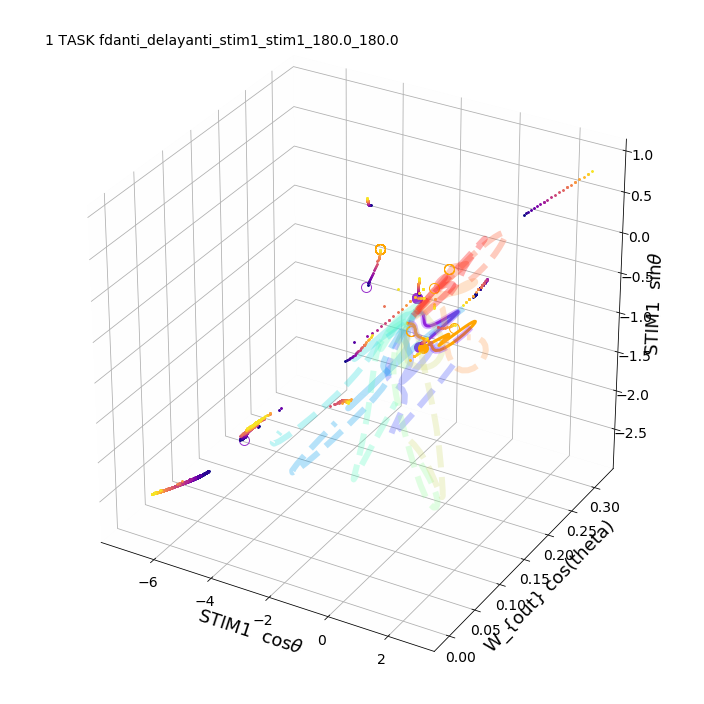

In [24]:
########## X TASK ###########
# from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 14})
from mpl_toolkits import mplot3d
from itertools import compress 
from tools_lnd import gen_X_from_model_dir, gen_trials_from_model_dir, get_T_inds, vanilla_run_with_h0,comp_eig_decomp
import numpy.random as npr


for offset in [0,]:#range(0,360,72):# 144
    fig = plt.figure(figsize=(10,10),tight_layout=True,facecolor='white')
    t_set = [(180+offset)%360, (180+offset)%360]
    trial_num = [int(offset/4.5),int(offset/4.5)]
    trial_set = range(0,80,8)

    rule_set = ['fdanti','delayanti']
    epoch_set = ['stim1','stim1']
    step_file = 'interp_tasks'
    linestyle = ['-',':']
    n_interp = 20

    trial_str = '_'.join(str(round(t,2)) for t in t_set[:len(rule_set)])
    rule_str = '_'.join(str(r) for r in rule_set)
    epoch_str = '_'.join(str(r) for r in epoch_set[:len(rule_set)])

    cmap_grad = plt.get_cmap('plasma')
    cmap_rainbow = plt.get_cmap('rainbow')
    cmap_discrete = ['darkorchid','orange']
    ax = fig.add_subplot(111, projection='3d')
    w_color = .005
    ax.w_xaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_yaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_zaxis.set_pane_color ((w_color, w_color, w_color, w_color))

    for ri in range(len(rule_set)):
        rule = rule_set[ri]
        trial = gen_trials_from_model_dir(m,rule,noise_on = False)
        epoch = epoch_set[ri]

#         f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        if len(lesion_units_list)>0:
            f = os.path.join(m,'lesion_fps','tf_fixed_pts_lesion'+str(lesion_cluster+1),rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        else:
            f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        
        fp_struct = np.load(f)
        sorted_fps = fp_struct['xstar']
        fp_inds = range(len(sorted_fps))
        eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])
        
        
        _,x = gen_X_from_model_dir(m,trial)
        T_inds = get_T_inds(trial,epoch)
        x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))

        #color by stim
        c_list = np.min(trial.stim_locs,axis=1)

        #color by target
    #     c_list = trial.y_loc[-1,:]

    
        plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,trial_num[ri],epoch,sorted_fps,fp_inds,eig_decomps,
               rand_step_coef = 0.1, al = 1, linestyle = linestyle, n_steps = 300, 
                   n_jit = 0,c = cmap_discrete[ri])


        plot_N3D(x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ri],alpha = .3)
    #     c_list = cmap_discrete[ri]
    #     highlight_trial = [trial_num[0],]
    #     plot_N3D(x_epoch[highlight_trial,:,:],D_use.T,c_list,linewidth = 3, linestyle = '-',alpha = 1)

        for step_i in range(n_interp):

            #a couple diff versions on filenames atm
    #         f = rule_set[0]+'_'+rule_set[1]+'_'+epoch_set[0]+'_'+str(t_set[0])+'_step_'+str(step_i)#'_'+str(t_set[1])

            f = rule_str+'_'+epoch_str+'_'+trial_str+'_step_'+str(step_i)
    #         f = rule_str+'_'+'go1'+'_'+trial_str+'_step_'+str(step_i)

            filename = os.path.join(m,step_file,rule_set[0]+'_'+rule_set[1],f+'.npz')
            fp_struct = np.load(filename)
            step_fps = fp_struct['xstar']

            fp_project = np.dot(step_fps,D_use)
            ax.plot3D(fp_project[:,0],fp_project[:,1],fp_project[:,2],'.',markersize = 3,c = cmap_grad(step_i/n_interp))

    tit = '1 TASK '+rule_str+'_'+epoch_str+'_'+trial_str
    ax.text2D(0.05, 0.95, tit, transform=ax.transAxes)
    ax.set_xlabel(axes_label1,fontsize = 18)
    ax.set_ylabel(axes_label2,fontsize = 18)
    ax.set_zlabel(axes_label3,fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if len(lesion_units_list)>0:
        save_dir = os.path.join(figpath,step_file,'lesion_fps'+str(lesion_cluster),axes_label1)
    else:
        save_dir = os.path.join(figpath,step_file,axes_label1)
        
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    figname = tit+'_'+step_file+'_'+str(t_set[0])
    plt.savefig(os.path.join(save_dir,figname+'.pdf'))
    plt.savefig(os.path.join(save_dir,figname+'.png'))
    plt.show()
#     pdb.set_trace()

In [126]:
#### conectivity analyses
from tools_lnd import get_model_params
w_in, b_in, w_out, b_out = get_model_params(m)

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [128]:
lesion_cluster = 2
ind_l = np.where(CA.labels == lesion_cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

In [212]:
within_rec = []
w_rec = w_in[25:]
all_cells = range(len(w_rec))
for clust_j in lesion_units_list:
    within_rec_temp = [w_rec[clust_j,i] for i in lesion_units_list]
    within_rec.append(within_rec_temp)

In [200]:
fig = plt.figure(figsize=(10,10),tight_layout=True,facecolor='white')
nonzero_inds = w_rec.flatten('F')>0
nonzero_cxns = np.log(w_rec.flatten('F')[nonzero_inds])
# plt.hist(nonzero_cxns,100)
plt.hist(np.log(within_rec))
plt.show()

/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [170]:
nonzero_inds = w_rec.flatten('F')>0

In [173]:
nonzero_inds = w_rec.flatten('F')>0
nonzero_cxns = w_rec.flatten('F')[nonzero_inds]

In [179]:
x = [2*i for i in lesion_units_list]

In [188]:
# mylist = []
mylist.append(3)

In [199]:
np.shape(within_rec)

(5, 5)

In [205]:
np.shape(np.diag(w_rec))

(256,)

In [213]:
fig = plt.figure(figsize=(5,5),tight_layout=True,facecolor='white')
plt.hist(np.diag(w_rec))
plt.show()

In [215]:
for n in range(10):
    npr.permutation(w_rec.flatten('F'))[:len(w_rec)]

In [233]:
fig = plt.figure(figsize=(5,5),tight_layout=True,facecolor='white')
# for n in range(100):
#     plt.hist(npr.permutation(w_rec.flatten('F'))[:len(w_rec)],color = 'k',alpha = .05)
    

plt.hist(npr.permutation(w_rec.flatten('F'))[:len(w_rec)],color = 'None',edgecolor = 'r',alpha = .8)
plt.show()

/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ValueError: color kwarg must have one color per dataset